# Linear Regression

- y = mx + c
- y = dependent variable
- x = independent variable


For home price prediction there is one parameters which is area by which price is measured
- Price
- Area
- Formula : price = m*area + c

- m = coeficient
- c = intercept

In [8]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model 

### Read csv

In [2]:
dataset = pd.read_csv("./hpp_training_dataset.csv")
dataset

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


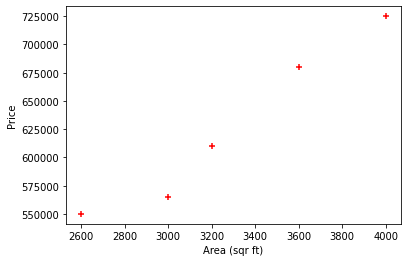

In [16]:
%matplotlib inline
plt.scatter(dataset[["area"]],dataset.price,color="red",marker="+")
plt.xlabel("Area (sqr ft)")
plt.ylabel("Price")
plt.show()

Train the model by giving this dataset as training 

In [10]:
Model = linear_model.LinearRegression()
Model.fit(dataset[['area']],dataset.price)

LinearRegression()

## Now our model is ready 

### Coeficient M 

In [13]:
M = Model.coef_
M

array([135.78767123])

### Intercept C

In [27]:
C = Model.intercept_
C

180616.43835616432

### Let's Predict a price with the area of 7000 sqr ft

In [24]:
Price = Model.predict([[7000]])
Price

array([1131130.1369863])

#### Let's Find if it is correct or not   

- m = 135.78767123
- C = 180616.43835616432

- y = (135.78767123 * 7000) + 180616.43835616432


In [30]:
y = (135.78767123 * 7000)+180616.43835616432
y

1131130.1369661642

## Let's Check with different test cases 

In [41]:
test_dataset = pd.read_csv("hpp_test_dataset.csv")
test_dataset

,area
0,3300
1,3200
2,7000
3,8000
4,12000
5,1200
6,120
7,2000


In [44]:
prediction = Model.predict(test_dataset)
prediction
result_dataset = test_dataset.copy()
result_dataset['price'] = prediction
result_dataset

# Result dataset with prediction price

,area,price
0,3300,6.287158e+05
1,3200,6.151370e+05
2,7000,1.131130e+06
3,8000,1.266918e+06
4,12000,1.810068e+06
5,1200,3.435616e+05
6,120,1.969110e+05
7,2000,4.521918e+05


In [48]:
result_dataset.to_csv("result.csv",index=False)

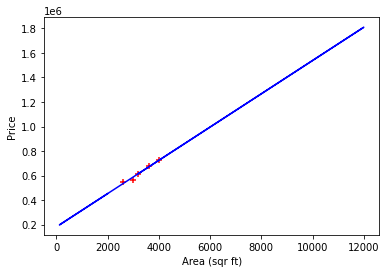

In [51]:
%matplotlib inline
plt.scatter(dataset[["area"]],dataset.price,color="red",marker="+")
plt.xlabel("Area (sqr ft)")
plt.ylabel("Price")
plt.plot(test_dataset.area,prediction,color='blue')
plt.show()